# K Means, Agglomerative and DBSCAN clustering on Amzon Fine Food Review

# Amazon Fine Food Review is about the reviews of customers on the food.

Number of columns: 10
Number of rows: 568454
Number of reviews: 568454
Number of products: 74258
Number of users: 256059

# Attribute information:
 
1) Id: Number of rows

2) ProductId: Unique ID of product 

3) UserId: User identification number

4) ProfileName: User name

5) HelpfulnessNumerator: Number of user found the review helpful

6) HelpfulnessDenominator: Number of user who found the review helpful or not

7) Score: Rating given to the product

8) Time: Timestamp at the time of review posted

9) Summary: Short version of text review

10) Text: Detailed text review

# Objective:

We need to find if the review is positive (1) or negative (0).

We are provided with the score from 1 to 5. Let's assume score 1 & 2 are negative and score 4 & 5 are positive. We are ignoring 3 as it can be considered as neutral.

# Loading Dataset

In [409]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline

from time import time

# warnings library is to ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [410]:
# Importing dataset

df = pd.read_csv('Reviews.csv')

# Displaying first 5 rows
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Data Information

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [412]:
print('Number of columns:' + ' ' + str(len(df.columns)))
print('Number of rows:' + ' ' + str(df['Id'].nunique()))
print('Number of reviews:' + ' ' + str(df['Id'].nunique()))
print('Number of products:' + ' ' + str(df['ProductId'].nunique()))
print('Number of users:' + ' ' + str(df['UserId'].nunique()))

Number of columns: 10
Number of rows: 568454
Number of reviews: 568454
Number of products: 74258
Number of users: 256059


# Assign Polarity

Let us assign positive (1) to the score 4 and 5

Let us assign negative (0) to the score 1 and 2

Let us ignore score having 3

In [413]:
# Let us first create a new dataset which doesn't have score 3 and it's respective rows.

print('Number of rows before removing score 3:' + ' ' + str(df['Id'].nunique()))

df_score = df[df['Score'] != 3]

print('Number of rows after removing score 3:' + ' ' + str(df_score['Id'].nunique()))

Number of rows before removing score 3: 568454
Number of rows after removing score 3: 525814


In [414]:
# Defining a function to assign polarity.

def scr(sc):
    if sc > 3:
        return 1
    return 0

In [415]:
# Calling function to assign polarity using .apply()
df_score['Score'] = df_score['Score'].apply(scr)

print("Number of positive (1) and negative (0) reviews")

df_score['Score'].value_counts()

Number of positive (1) and negative (0) reviews


1    443777
0     82037
Name: Score, dtype: int64

# Exploratory Data Analysis

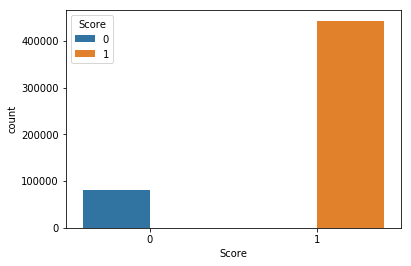

In [416]:
sns.countplot(df_score['Score'], hue = df_score['Score'])

# Observation:

As we can see, number of negative reviews are closer to 10k while positive review is more than 400k.

Ratio of negative and positive review can be assumed to be ~ 1:4.

Also, we can conclude that ~90% of the reviews are positive.

# Data Cleaning:

We have performed few techniques to clean the text and summary data

1) Null values removed

2) Duplicates removed

3) URL links removed

4) HTML tags removed

5) Stopwords removed

6) Stem words obtained

7) Converted from short form word to long form word

We have already performed above data clearning technique and saved.

Importing the clean data.

In [417]:
df_clean = pd.read_csv('Amazon_Final_time.csv')

df_clean = df_clean.dropna()

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364149 entries, 150523 to 327600
Data columns (total 12 columns):
Id                        364149 non-null int64
ProductId                 364149 non-null object
UserId                    364149 non-null object
ProfileName               364149 non-null object
HelpfulnessNumerator      364149 non-null int64
HelpfulnessDenominator    364149 non-null int64
Score                     364149 non-null int64
Time                      364149 non-null int64
Summary                   364149 non-null object
Text                      364149 non-null object
Clean_Text                364149 non-null object
Clean_Summary             364149 non-null object
dtypes: int64(5), object(7)
memory usage: 36.1+ MB


In [418]:
percentage_red = np.round((df_clean.shape[0]/df.shape[0]),5)*100
print("Data percentage reduced to ", percentage_red)

Data percentage reduced to  64.05999999999999


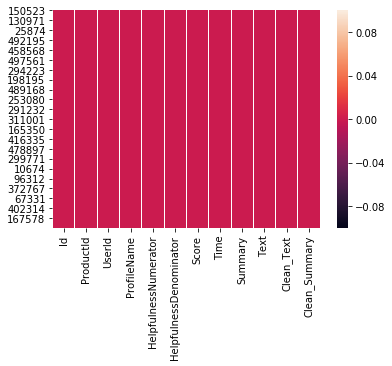

In [419]:
sns.heatmap(df_clean.isnull())

# Observation:
    
There are no null values now. We are good to go to proceed with vectorization

# 50k dataframe

Picking up random 50k samples from the dataset

In [39]:
df_50k = df_clean.sample(n = 50000)

print("Shape of sample dataframe is ", df_50k.shape)
print("Total number of rows: ", df_50k.shape[0])
print("Total number of columns: ", df_50k.shape[1])

Shape of sample dataframe is  (50000, 12)
Total number of rows:  50000
Total number of columns:  12


# Time Series Split

Since the dataset is based on time series, we need to sort based on time in an ascending order

In [40]:
df_sort_50k = df_50k.sort_values('Time', ascending = True)

In [41]:
x_50k = df_sort_50k['Clean_Text']

# Defining a function 'kmc'  to find optimal k value.

In [15]:
# Defining functions 'KC'  to find best k.

# import libraries
from sklearn.cluster import KMeans

def kmc(x):
    
    inertia = []
    
    k = range(1, 10, 2)
    
    for i in k:
        km = KMeans(n_clusters = i)
        km = km.fit(x)
        kmi = km.inertia_
        inertia.append(kmi)
    
    ine = [x for x in inertia] 
    opt_k = k[ine.index(min(ine))]
    
    km_label = km
    
    print("\nMinimum inertia value and corresponding K value\n")
    print('*'*50, '\n')
    print("Minimum inertia value is", min(inertia))
    print("Corresponding K value is", opt_k, '\n')
    print('*'*50, '\n')
    
    plt.figure(figsize = (8,4))
    
    plt.plot(k,ine, marker='o', color='blue', markerfacecolor='g', markersize=10, alpha=0.5)
    plt.title("K values v/s Inertia values")
    plt.xlabel("K values")
    plt.ylabel("Inertia values")
    
    for xy in zip(k, np.round(ine, 3)):
        plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
    
    return opt_k

# Defining a function 'km_graph' to graphically represnt the count of review data in each cluster.

For height representation on bar, (patches) referred https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

In [16]:
# Defining a function 'km_graph' to graphically represnt the count of review data in each cluster.

def km_graph(k, x):
    
    km = KMeans(n_clusters = k, random_state = 0)
    km = km.fit(x)
    label = km.labels_
    print("\nGraphical representation of number of review data in each cluster\n")
    
    plt.figure(figsize = (10,6))
    
    ht = sns.countplot(label)
    plt.title("Number of review data in each cluster")
    plt.xlabel("Clusters")
    plt.ylabel("Count")
    
    for i in ht.patches:
        ht.text(i.get_x()+.04, i.get_height()+0.2, \
            str(round((i.get_height()), 2)))
    
    return label

# Defining a function to get the text data in each cluster

In [17]:
# Defining a function to get the text data in each cluster

def cluster(k, lab):
 
    cluster_data = []
    
    df_sort_50k['label'] = lab
    
    for i in range(k):
        
        print()
        print('*'*10)
        print("Cluster", i)
        print('*'*10, '\n')
        lt = len(df_sort_50k[df_sort_50k['label'] == i])
        rd = np.random.randint(low = 0, high = lt, size = 3)
        for n in rd:
            wd = df_sort_50k[df_sort_50k['label'] == i]['Clean_Text'].iloc[n]
            print('\n',wd)
            print("*"*35)
        
        cluster_data.append(wd)
        
    return cluster_data

# Defining 'wc' function to get Word Cloud

In [15]:
# Defining 'wc' function to get Word Cloud

# import library
from wordcloud import WordCloud

def wc(w, k):
    
    m = range(k)
    
    for i in m:
        
        t = int(k+1)/2
        
        plt.figure(figsize = (10,6))
        plt.subplot(t, 2, i+1)
    
        wc = WordCloud(background_color = 'white')
        wcg = wc.generate(w[i])
        plt.imshow(wcg, interpolation = 'bilinear')

# K Means Clustering- Bag of Words

In [201]:
# Import CountVectorizer library
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance
# Bi-gram
cv = CountVectorizer(ngram_range = (1,2), max_features = 5000)

# Fit and transform data
x_50k_f = cv.fit_transform(x_50k)

# Normalization

Normalization is a feature scaling technique which transforms all the data variables to the same scale or in same range i.e 0.0 to 0.1

In [202]:
# Import normalize library
from sklearn.preprocessing import normalize

# Normalize data
x_50k_n = normalize(x_50k_f)

# Calling 'kmc' function to get optimal K value


Minimum inertia value and corresponding K value

************************************************** 

Minimum inertia value is 44583.647449778
Corresponding K value is 9 

************************************************** 



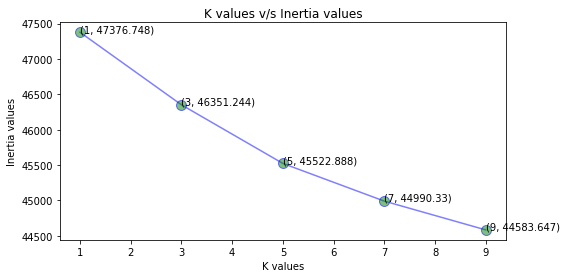

In [203]:
k_k_b = kmc(x_50k_n)

# Observation:
    
Optimal K value we go tis 9 with inertia value 44583.647

# Calling 'km_graph' function to represent graphically review data in each cluster.


Graphical representation of number of review data in each cluster



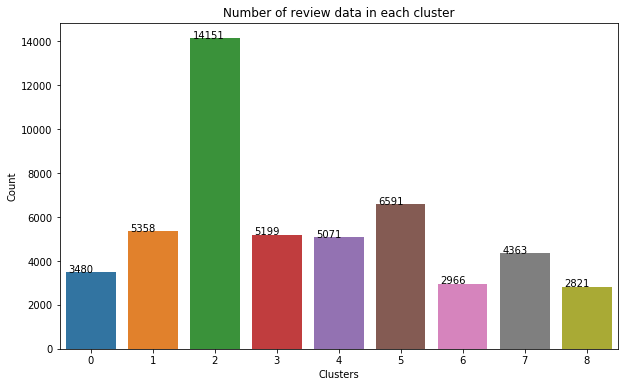

In [204]:
# Calling 'km_graph' function to represent graphically review data in each cluster.

k_l_b = km_graph(k_k_b, x_50k_n)

# Calling 'cluster' function to get random review data from each cluster

In [205]:
# Calling 'cluster' function to get random review data from each cluster

k_c_b = cluster(k_k_b, k_l_b)


**********
Cluster 0
********** 


 tri various flavia k cup year must say foundri blend probabl one best coffe rich smooth without doubt plan order
***********************************

 favorit coffe flavor rich smooth hard find pleas find receiv quick
***********************************

 great strong robust coffe coffe allow hous straight new orlean
***********************************

**********
Cluster 1
********** 


 love stuff way get daughter drink milk whole famili love love low calori think go thru gallon milk day great work ship product fast
***********************************

 think coffe mate product think sweeten creamer bottl keep fridg love fridg desk keep bottl imagin happi found happi would creamer also sweeten pretti let turn flavor creamer sweeten
***********************************

 love roast chestnut sometim find look vain season product excel idea roast chestnut reason price delici conveni come alreadi roast almost peel although shell shell cut half time che

# Calling 'wc' function to get word cloud for few review data in each cluster

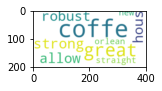

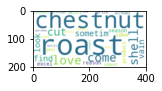

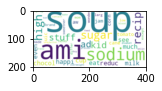

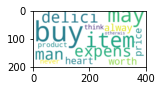

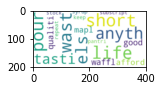

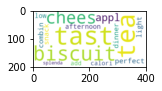

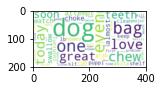

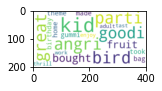

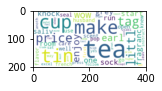

In [206]:
# Calling 'wc' function to get word cloud for few review data in each cluster

wc(k_c_b, k_k_b)

# Observation:
    
BoW didn't work very well in clustering relavant reviews in the same cluster.

Examples:

1) Cluster 0 and cluster 1 has reviews about 'coffee'

2) Cluster 1 and clsuter 2 has reveiws about 'milk'.

# Random Forest- TF-IDF: Term Frequency Inverse Document Frequency

In [23]:
# Import TfidfVectorizer library
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance
# bi-gram
tf = TfidfVectorizer(ngram_range = (1,2), max_features = 5000)

# Fit and transform train data
x_50k_tf = tf.fit_transform(x_50k)

# Normalization

In [24]:
# Import normalize library
from sklearn.preprocessing import normalize

# Normalize train data
x_50k_tf_n = normalize(x_50k_tf)

# Calling 'kmc' function to get optimal K value


Minimum inertia value and corresponding K value

************************************************** 

Minimum inertia value is 47429.562771497476
Corresponding K value is 9 

************************************************** 



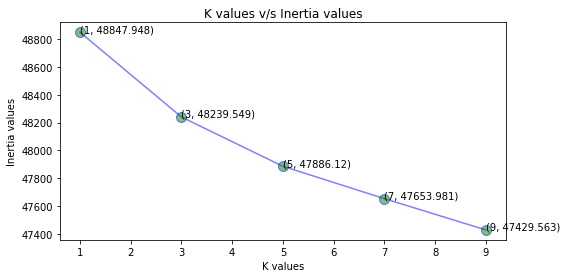

In [25]:
# Calling 'kmc' function to get optimal K value

k_k_tf = kmc(x_50k_tf_n)

# Observation:
    
Optimal K value we go tis 9 with inertia value 47429.563

# Calling 'km_graph' function to represent graphically review data in each cluster.


Graphical representation of number of review data in each cluster



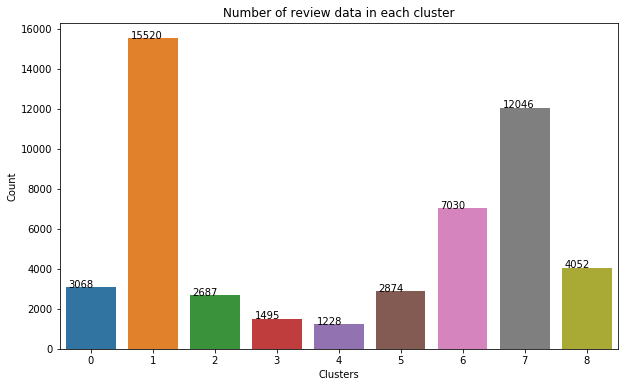

In [26]:
# Calling 'km_graph' function to represent graphically review data in each cluster.

k_l_tf = km_graph(k_k_tf, x_50k_tf_n)

# Calling 'cluster' function to get random review data from each cluster

In [27]:
# Calling 'cluster' function to get random review data from each cluster

k_c_tf = cluster(k_k_tf, k_l_tf)


**********
Cluster 0
********** 


 friend happi find product amazon com local store stop carri sure ship lipton site atroci order amazon tea exact expect although one box open far tea bag seem slight wrong pull string topper bag pull connect two side bag howev tea leakag small price pay tea love much
***********************************

 tea tast great make feel great say scientif evid behind love tea boyfriend bought whim local health food store finish entir box week high recommend tulsi tea great
***********************************

 tea love beat price organ look cherri tea keep look person even smell cherri love favor better describ black tea without bite sometim get black tea cherri seem mellow flavor tea star give four due miss cherri
***********************************

**********
Cluster 1
********** 


 hot cayenn good experi brand general cayenn except definit fresh gave one bottl famili member
***********************************

 cost break dollar oz like love hop guilt a

# Calling 'wc' function to get word cloud for few review data in each cluster

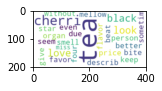

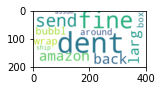

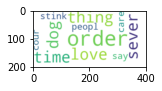

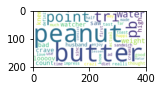

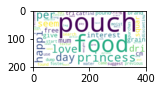

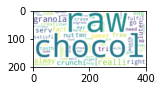

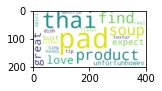

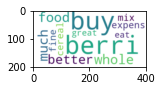

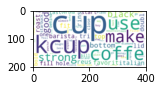

In [28]:
# Calling 'wc' function to get word cloud for few review data in each cluster

wc(k_c_tf, k_k_tf)

# Observation: 

TFIDF worked very well in clustering relevant reviews.

Examples:

1) Cluster 0 has reviews about 'tea'.

2) Cluster 2 has reviews about 'dogs'.

3) Cluster 5 has reviews about 'chocolate'.

# K Means Clustering: Word2Vec

# Defining a function to create Word2Vec

In [44]:
# Defining a function to create Word2Vec

def w(x_t):
    
    list_t = []
    
    for text in x_t:
        split = text.split()
        list_t.append(split)
    return list_t

# Calling function 'w' to get list of words of x_50k

In [45]:
# Calling function 'w' to get list of words of x_train, x_test and x_cv

x_50k_l = w(x_50k)

In [46]:
# Creating Word2Vec model using train data (x_train_list)

# import gensim library
import gensim

#Create an instance for the genism model
w2v_model = gensim.models.Word2Vec(x_50k_l, min_count = 5, size = 50, workers = 4)
print(w2v_model)

# Creating own corpus vocabulary
w2v_vocab = w2v_model[w2v_model.wv.vocab]
print("Shape of w2v_vocab:" + ' ' + str(w2v_vocab.shape))

# Creating list of words
w2v_word = list(w2v_model.wv.vocab)
print("Length of w2v_word:" + ' ' + str(len(w2v_word)), '\n')
print('*'*50)
print("First 10 words from the list of words w2v_word:")
w2v_word[:10]

Word2Vec(vocab=9822, size=50, alpha=0.025)
Shape of w2v_vocab: (9822, 50)
Length of w2v_word: 9822 

**************************************************
First 10 words from the list of words w2v_word:


['beetlejuic',
 'well',
 'written',
 'movi',
 'everyth',
 'excel',
 'act',
 'special',
 'effect',
 'delight']

In [47]:
# Let's check the most similar words

w2v_model.wv.most_similar('flavor')

[('flavour', 0.7937209606170654),
 ('tast', 0.7257750630378723),
 ('hint', 0.7048247456550598),
 ('distinct', 0.702710747718811),
 ('subtl', 0.6953634023666382),
 ('overpow', 0.6908576488494873),
 ('overwhelm', 0.6638085842132568),
 ('smoki', 0.6627833247184753),
 ('fruiti', 0.6407834887504578),
 ('nutti', 0.6370744705200195)]

# Observation:
As we can see, .most_similar gives the similar words to the input word along with the percentage of similarity

# Defining a function for Avg Word2Vec

Convert Word2Vec to vectors.

Average Word2Vec is nothing but the average of vectors of each word of a given text/review/sentence.

In [50]:
# Defining a function for Avg Word2Vec

def sent(word_list, w2v_w, w2v_m):

    sentence = [] # avg w2v of sentence/review will be stored in the empty list

    for sen in word_list:
        zero = np.zeros(50)  # (50,) matrix which is initial to add to the first w2v of word in a sentence/review
        count_div = 0         # Increases by 1 every iteration and divides the w2v the sum of w2v sentence/review
        for word in sen:
            if word in w2v_w:
                vec = w2v_m.wv[word]  # Gets the w2v for each word in a sentence/review
                zero += vec              # Sums the w2v of each word in a sentence/review at every iteration
                count_div += 1           # Increases by 1 at every iteration
        if count_div != 0:
            zero /= count_div            # w2v of sentence/review is divided by total number of words in a sentence/review (average w2v)
        sentence.append(zero)            # Stores all the avg w2z in an empty list sentence
    
    return sentence

# Average Word2Vec- Calling 'sent' function to get Avg Word2Vec

Convert Word2Vec to vectors.

Average Word2Vec is nothing but the average of vectors of each word of a given text/review/sentence.

In [51]:
# Calling 'sent' function to get Avg Word2Vec

# Avg Word2Vec for x_50k
x_50k_avg_w2v = sent(x_50k_l, w2v_word, w2v_model)

# Normalization

In [54]:
# Normalize train data

from sklearn.preprocessing import normalize

x_50k_avg_n = normalize(x_50k_avg_w2v)
print("Shape of normalized train Avg Word2Vec:" + ' ' + str(len(x_50k_avg_n)))

Shape of normalized train Avg Word2Vec: 50000


# Calling 'kmc' function to get optimal K value


Minimum inertia value and corresponding K value

************************************************** 

Minimum inertia value is 20567.294531613123
Corresponding K value is 9 

************************************************** 



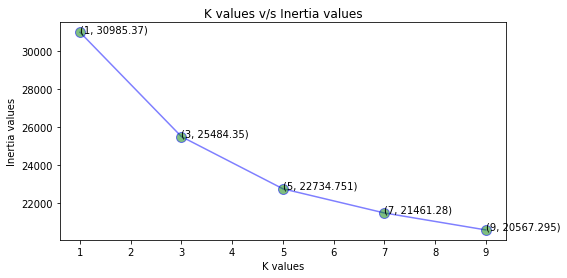

In [36]:
# Calling 'kmc' function to get optimal K value

k_k_avg = kmc(x_50k_avg_n)

# Observation:
    
Optimal K value we go tis 9 with inertia value 20567.295

# Calling 'km_graph' function to represent graphically review data in each cluster.


Graphical representation of number of review data in each cluster



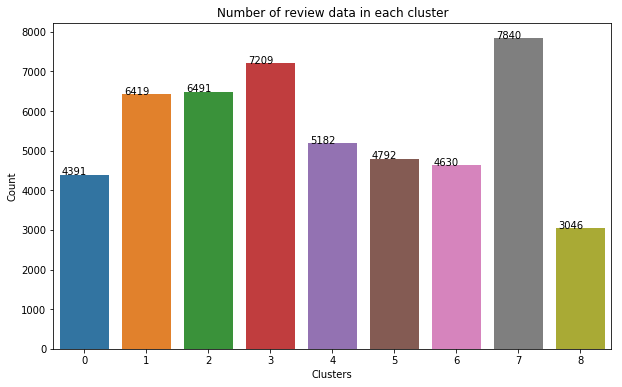

In [37]:
# Calling 'km_graph' function to represent graphically review data in each cluster.

k_l_avg = km_graph(k_k_avg, x_50k_avg_n)

# Calling 'cluster' function to get random review data from each cluster

In [38]:
# Calling 'cluster' function to get random review data from each cluster

k_c_avg = cluster(k_k_tf, k_l_avg)


**********
Cluster 0
********** 


 price perfect bought coffe give tri make decent cup would rave prefer eight clock brand would buy goe sale
***********************************

 product fill need lid reus k cup make possibl make k cup coffe like save money buy new k cup great product disposakup lid dispos replac lid use keurig k cup box lid
***********************************

 sinc drink coffe black without creamer sweeten tast coffe realli matter vanilla flavor coffe come ground save step grind bean even though bean pre ground flavor brew still deep rich aromat fragranc vanilla still permeat open vacuum seal bag flavor vanilla coffe subtl mild mention flavor coffe particular flavor quit distinct strong domin tast coffe person good thing bad thing depend particular flavor like pumpkin spice strong flavor prefer cinnamon vanilla subtl look heavili flavor vanilla coffe expect someth bit subtl flavor ounc terribl larg quantiti coffe money said howev starbuck never bargain hunter choi

# Calling 'wc' function to get word cloud for few review data in each cluster

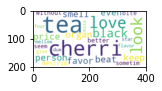

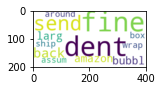

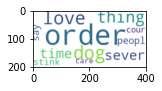

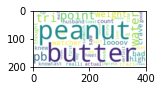

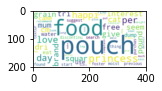

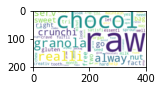

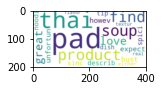

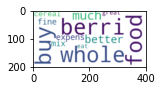

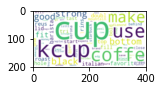

In [39]:
# Calling 'wc' function to get word cloud for few review data in each cluster

wc(k_c_tf, k_k_tf)

# Observation:

AVG WORD2VEC didn't work very well in clustering relevant reviews.

Examples:

1) Cluster 0 and clust 1 has reviews about 'coffee'.

2) Cluster 2 and cluster 8 has reviews about 'tea'.

# K Means Clustering- TF-IDF Word2Vec

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_model = TfidfVectorizer()

tf_idf_50k = tf_model.fit_transform(x_50k)

# we are converting a dictionary with word as a key, and the idf as a value

dicti = dict(zip(tf_model.get_feature_names(), list(tf_model.idf_)))

# Defining a function to get TF-IDF Word2Vec

In [60]:
# Defining a function to get TF-IDF Word2Vec

def tf_w(word_list, w2v_w, w2v_m):
    tf_sentence = []   # Empty list to store the tfidf-w2v values
    for tf_sent in word_list:
        tf_zero = np.zeros(50)     # (50,) matrix which is initial to add to the first w2v of word in a sentence/review
        tf_count = 0                # Increases by tfidf value of previous tfidf value for every iteration and divides the sum of tfidf-w2v of sentence/review
        for tf_word in tf_sent:
            if tf_word in w2v_w:
                tf_vec = w2v_m.wv[tf_word]  # Get tfidf_w2v for each word in a sentence/review       
                if tf_word in dicti:
                    # tf_w2v = tf_idf_matrix[row, tf_feat.index(tf_word)]
                    tf_w2v = dicti[tf_word] * (tf_sent.count(tf_word))/len(tf_sent) 
                    tf_zero += (tf_vec * tf_w2v)    # Increase by tfidf-w2v value for every iteration
                    tf_count += tf_w2v              # Increase by ifidf value for every iteration
        if tf_count != 0:
            tf_zero /= tf_count                     # tfidf-w2v of sentence/review is divided by total number of tfidf of words in a sentence/review (tfidf-w2v)
        tf_sentence.append(tf_zero)                # Stores all the avg w2z in an empty list sentence
    
    return tf_sentence

# Calling 'tf_w' function to get TF-IDF Word2Vec

In [61]:
# Calling 'tf_w' function to get TF-IDF Word2Vec

# TFIDF Word2Vec for x_50k_l
x_50k_tf_w2v = tf_w(x_50k_l, w2v_word, w2v_model)

# Normalization

In [62]:
# Normalize train data
x_50k_tw_n = normalize(x_50k_tf_w2v)
print("Shape of normalized train TFIDF Word2Vec:" + ' ' + str(len(x_50k_tw_n)))

Shape of normalized train TFIDF Word2Vec: 50000


# Calling 'kmc' function to get optimal K value


Minimum inertia value and corresponding K value

************************************************** 

Minimum inertia value is 23958.09681783091
Corresponding K value is 9 

************************************************** 



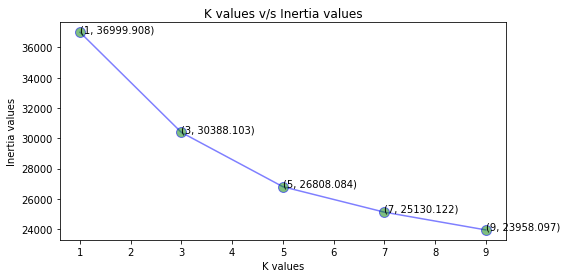

In [44]:
# Calling 'kmc' function to get optimal K value

k_k_tw = kmc(x_50k_tw_n)

# Observation:
    
Optimal K value we go tis 9 with inertia value 23958

# Calling 'km_graph' function to represent graphically review data in each cluster.


Graphical representation of number of review data in each cluster



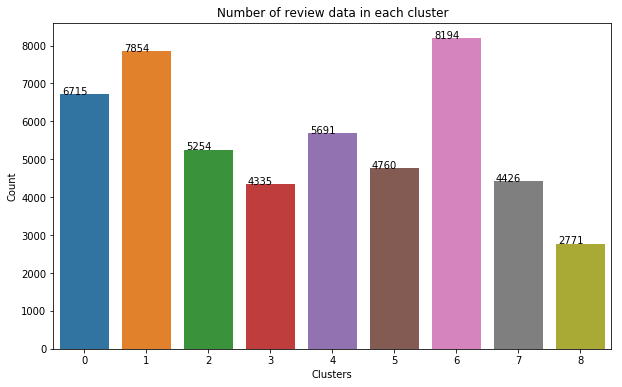

In [45]:
# Calling 'km_graph' function to represent graphically review data in each cluster.

k_l_tw = km_graph(k_k_tw, x_50k_tw_n)

# Calling 'cluster' function to get 1st review data from each cluster

In [46]:
# Calling 'cluster' function to get 1st review data from each cluster

k_c_tw = cluster(k_k_tw, k_l_tw)


**********
Cluster 0
********** 


 real fan ginger honey drink lot republ tea version plus love real ginger ginger ale kind almost burn throat feel go way well kili instant beverag quit use fine care say lot ginger ginger honey drink kind odd flavor first impress drink tea bag etc open singl serv pouch dark granual insid dump cup say add water mls lucki fing pyrex measur cup mls ad hot water stir color cup pretti dark brown lot darker tea etc scent okay bad flavor small sip super strong think water would realli help either also ginger aspect pretti sweet remind candi ginger love flavor know distract person would drink tri cold might better flavor realli put like conveni sweeten alreadi granual teabag mess
***********************************

 full fruiti flavor sweet kinda like starburst sweet love thing sweet
***********************************

 bought health food store initi thought better great product nerv charg forti buck bottl juic like fact paid unadulter acai blend includ lo

# Calling 'wc' function to get word cloud for few review data in each cluster

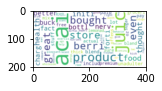

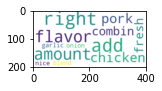

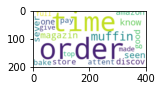

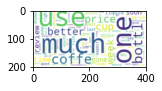

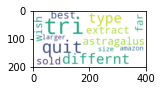

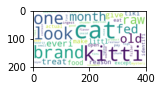

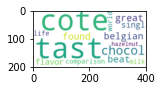

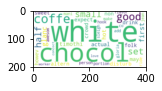

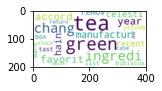

In [47]:
# Calling 'wc' function to get word cloud for few review data in each cluster

wc(k_c_tw, k_k_tw)

# Observation: 

TFIDF WORD2VEC didn't work very well in clustering relevant reviews.

Examples:

1) Cluster 1 and cluster 4 has reviews about 'chicken'.

2) Cluster 3 and cluster 7 has reviews about 'coffee'.

# Agglomerative Clustering

# 5k dataset

Picking up random 5k samples from the dataset

In [16]:
df_5k = df_clean.sample(n = 5000)

print("Shape of sample dataframe is ", df_5k.shape)
print("Total number of rows: ", df_5k.shape[0])
print("Total number of columns: ", df_5k.shape[1])

Shape of sample dataframe is  (5000, 12)
Total number of rows:  5000
Total number of columns:  12


# Time Series Split

Since the dataset is based on time series, we need to sort based on time in an ascending order

In [17]:
df_sort_5k = df_5k.sort_values('Time', ascending = True)

In [18]:
x_5k = df_sort_5k['Clean_Text']

# Defining a function 'ag_graph' to graphically represnt the count of review data in each cluster.

In [75]:
# Defining a function 'ag_graph' to graphically represnt the count of review data in each cluster.

# import libraries
from sklearn.cluster import AgglomerativeClustering

def ag_graph(x, k):
    
    ac = AgglomerativeClustering(n_clusters = k)
    ac = ac.fit(x)
    label = ac.labels_
    
    print("\nWith clusters", k, "graphical representation of number of review data in each cluster\n")
    plt.figure(figsize = (10,6))
    
    ht = sns.countplot(label)
    plt.title("Number of review data in each cluster")
    plt.xlabel("Clusters")
    plt.ylabel("Count")
    print("\nGraphical representation of number of review data in each cluster\n")

    for i in ht.patches:
        ht.text(i.get_x()+.04, i.get_height()+0.2, \
            str(round((i.get_height()), 2)))
    
    return label

# Defining a function 'ac' to represent words in clusters

In [220]:
# Defining functions 'ac' to represent words in cluster.

# import libraries
from sklearn.cluster import AgglomerativeClustering

def ac(x, k, label):

    cluster_data = []
    
    df_sort_5k['label'] = label
    print("\nWith clusters", k)
    print("*"*25)
    
    for i in range(k):
    
        print()
        print('*'*10)
        print("Cluster", i)
        print('*'*10)
        lt = len(df_sort_5k[df_sort_5k['label'] == i])
        rd = np.random.randint(low = 0, high = lt, size = 3)
        for n in rd:
            wd = df_sort_5k[df_sort_5k['label'] == i]['Clean_Text'].iloc[n]
            print('\n',wd)
            print("*"*35)
        
        cluster_data.append(wd)
    
    return cluster_data

# Calling function 'w' to get list of words

In [23]:
# Calling function 'w' to get list of words

x_5k_l = w(x_5k)

In [35]:
# Creating Word2Vec model using train data (x_train_list)

# import gensim library
import gensim

#Create an instance for the genism model
w2v_model_ag = gensim.models.Word2Vec(x_5k_l, min_count = 5, size = 50, workers = 4)
print(w2v_model_ag)

# Creating own corpus vocabulary
w2v_vocab_ag = w2v_model_ag[w2v_model_ag.wv.vocab]
print("Shape of w2v_vocab_ag:" + ' ' + str(w2v_vocab_ag.shape))

# Creating list of words
w2v_word_ag = list(w2v_model_ag.wv.vocab)
print("Length of w2v_word_ag:" + ' ' + str(len(w2v_word_ag)), '\n')
print('*'*50)
print("First 10 words from the list of words w2v_word_ag:")
w2v_word_ag[:10]

Word2Vec(vocab=3316, size=50, alpha=0.025)
Shape of w2v_vocab_ag: (3316, 50)
Length of w2v_word_ag: 3316 

**************************************************
First 10 words from the list of words w2v_word_ag:


['wine',
 'saver',
 'great',
 'mani',
 'way',
 'obvious',
 'wonder',
 'abl',
 'open',
 'bottl']

In [36]:
# Let's check the most similar words

w2v_model_ag.wv.most_similar('flavor')

[('dark', 0.9887779355049133),
 ('bitter', 0.9868571758270264),
 ('strong', 0.9789663553237915),
 ('smooth', 0.9739487767219543),
 ('ice', 0.9724370837211609),
 ('tast', 0.9701613187789917),
 ('drink', 0.965309202671051),
 ('milk', 0.9632735848426819),
 ('chocol', 0.9609551429748535),
 ('nice', 0.9606232047080994)]

# Observation:
As we can see, most_similar gives the similar words to the input word along with the percentage of similarity

# Average Word2Vec- Calling 'sent_ag' function to get Avg Word2Vec

Convert Word2Vec to vectors.

Average Word2Vec is nothing but the average of vectors of each word of a given text/review/sentence.

In [64]:
# Calling 'sent_ag' function to get Avg Word2Vec

# Avg Word2Vec for x_5k
x_5k_avg_w2v = sent(x_5k_l, w2v_word_ag, w2v_model_ag)

# Normalization

In [65]:
# Normalize data
x_5k_avg_n = normalize(x_5k_avg_w2v)
print("Shape of normalized Avg Word2Vec:" + ' ' + str(len(x_5k_avg_n)))

Shape of normalized Avg Word2Vec: 5000


# Calling 'ag_graph' function for graphical representation of number of review data in each cluster.

In [229]:
a2_k_avg = 2


With clusters 2 graphical representation of number of review data in each cluster


Graphical representation of number of review data in each cluster



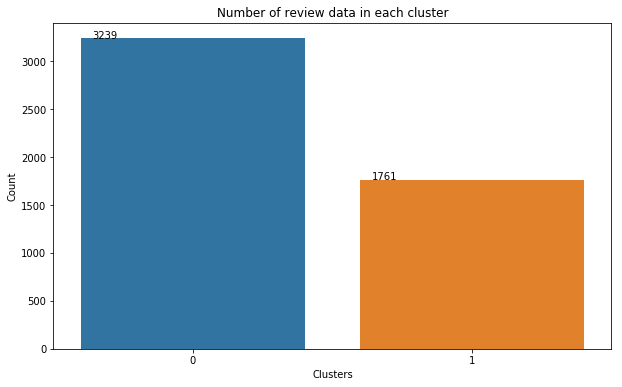

In [230]:
# Calling 'ag_graph' function for graphical representation of number of review data in each cluster.

a2_l_avg = ag_graph(x_5k_avg_n, a2_k_avg)

# Calling 'ac' function with cluster 2

In [231]:
# Calling 'ac' function with cluster 2

a2_c_avg = ac(x_5k_avg_n, a2_k_avg, a2_l_avg)


With clusters 2
*************************

**********
Cluster 0
**********

 tri product lot thing like routin use shea argan almond oil alway look natur plant base product might well make hair shini come wash hair twice third round bit skeptic put consist wax mix petroleum oil thick thick difficult appli even thin layer smell nice give star could give zero use wash hair last night felt greasi wash come wash went sleep minut wash hope get time ruin sheet consid review much recommend warn updat wash hair time abl get feel greasi damp heavi get cloth sheet would say singular one worst product ever use would even recommend trial unless will live nourish oil consist might make nice furnitur wood floor polish unless like greaser look would put hair hope third wash get mine even made dog mad usual get walk get shower today wait hour later shampoo twice hair dresser came home tri recommend liquid joy two rise dish soap got post tri feel like way get shave head stylist actual suggest laugh p 

# Calling 'wc' function to get word cloud

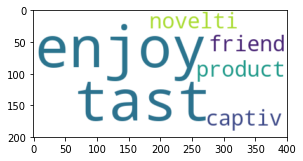

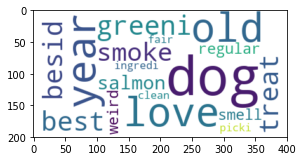

In [232]:
# Calling 'wc' function to get word cloud

wc(a2_c_avg, a2_k_avg)

# Observation:

Since only 2 clsuters, it is not easy to conclude anything.

# Calling 'ag_graph' function for graphical representation of number of review data in each cluster.

In [233]:
a5_k_avg = 5


With clusters 5 graphical representation of number of review data in each cluster


Graphical representation of number of review data in each cluster



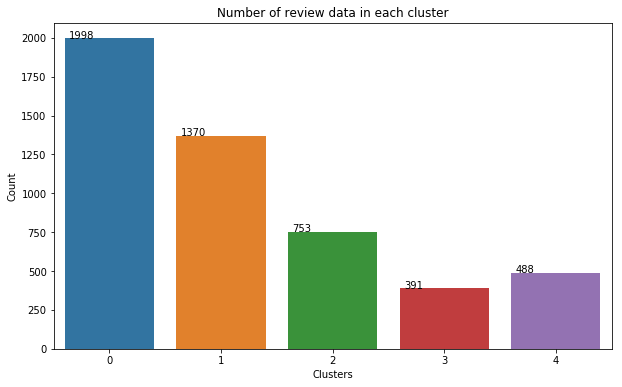

In [234]:
# Calling 'ag_graph' function for graphical representation of number of review data in each cluster.

a5_l_avg = ag_graph(x_5k_avg_n, a5_k_avg)

# Calling 'ac' function with cluster 5

In [235]:
# Calling 'ac' function with cluster 7

a5_c_avg = ac(x_5k_avg_n, a5_k_avg, a5_l_avg)


With clusters 5
*************************

**********
Cluster 0
**********

 thought flour work well grain sugar free zucchini bread recip hold lot moistur dens tast good think nice great option grain free bake co worker tri said told would known differ regular zucchini bread
***********************************

 shampoo fine anyth bad say normal use salon shampoo color treat hair would definit use pinch need pick someth store use
***********************************

 tri far seem lack flavor discern type poultri although turkey tast closer extrem mild chicken hope littl intens flavor got like southeastern mill version actual flavor good cannot seem find frugal size small coupl ounc packet pound version reason price would great
***********************************

**********
Cluster 1
**********

 search alarm chili mix month store thrill find amazon
***********************************

 origin gummi bear rememb grow mid absolut delici worth everi penni two thumb haribo
**************

# Calling 'wc' function to get word cloud

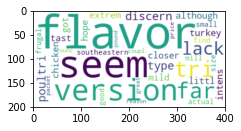

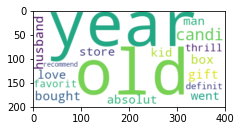

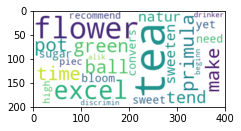

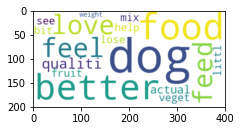

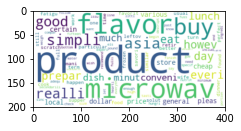

In [236]:
# Calling 'wc' function to get word cloud

wc(a5_c_avg, a5_k_avg)

# Observation:

Avg Word2Vec didn't worked very well in clustering reviews.

Different clusters has different reveiews and not any of them are relevant.

# Calling 'ag_graph' function for graphical representation of number of review data in each cluster.

In [237]:
a7_k_avg = 7


With clusters 7 graphical representation of number of review data in each cluster


Graphical representation of number of review data in each cluster



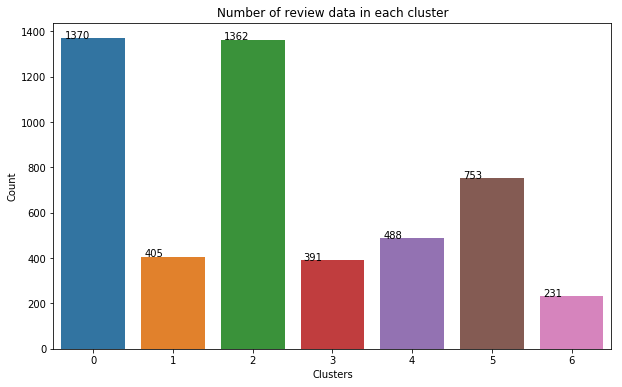

In [238]:
# Calling 'ag_graph' function for graphical representation of number of review data in each cluster.

a7_l_avg = ag_graph(x_5k_avg_n, a7_k_avg)

# Calling 'ac' function with cluster 7

In [239]:
# Calling 'ac' function with cluster 7

a7_c_avg = ac(x_5k_avg_n, a7_k_avg, a7_l_avg)


With clusters 7
*************************

**********
Cluster 0
**********

 subscrib vita coco sinc offer thought tri bought one coconut water organ label horribl tast compar vita coco cannot even return per amazon polici groceri sincer advic wast money
***********************************

 spice add good flavor cook fine consist color aroma three pack econom price beat local supermarket
***********************************

 arriv record time super condit got two one thank gift wish second like anoth review go bonsai euphamist call gal pot probabl realli transplant dirt later thumb
***********************************

**********
Cluster 1
**********

 would like say product amaz calcul price soy milk store per half gallon usual drink week get super expens also appreci addit chemic garbag produc contain sinc soy milk contain recycl estim cup organ soybean use zerowat filter water soak make soy milk save per everi half gallon also use wonder machin make milk soy yogurt anoth half gallo

# Calling 'wc' function to get word cloud

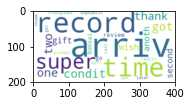

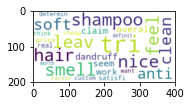

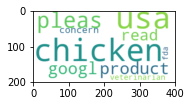

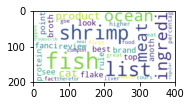

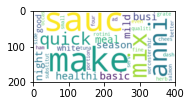

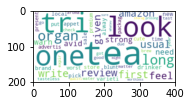

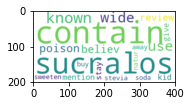

In [240]:
# Calling 'wc' function to get word cloud

wc(a7_c_avg, a7_k_avg)

# Observation

With cluster 7, AVG WORD2VEC could cluster relevant reviews.

# Calling 'ag_graph' function for graphical representation of number of review data in each cluster.

In [241]:
a10_k_avg = 10


With clusters 10 graphical representation of number of review data in each cluster


Graphical representation of number of review data in each cluster



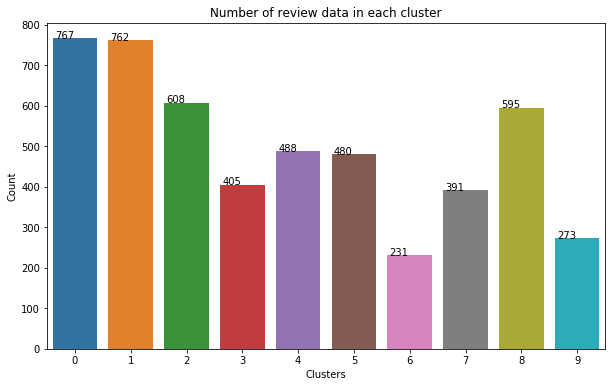

In [242]:
# Calling 'ag_graph' function for graphical representation of number of review data in each cluster.

a10_l_avg = ag_graph(x_5k_avg_n, a10_k_avg)

# Calling 'ac' function with cluster 10

In [243]:
# Calling 'ac' function with cluster 10

a10_c_avg = ac(x_5k_avg_n, a10_k_avg, a10_l_avg)


With clusters 10
*************************

**********
Cluster 0
**********

 amazon com amaz superstor one home bake bread know valu gluten enrich flour bread flour make bread chewi yet soft tasti palat product review assur week later up deliv transfer flour ziploc bag froze safe enjoy bread amaz
***********************************

 great cooki crunchi son like eat milk like oreo otherwis chocolati great snack
***********************************

 big peanut butter fan best healthi slap whole wheat bread make eat hors food bird seed bearabl
***********************************

**********
Cluster 1
**********

 dri apricot seem fresh nice tast packag individu proper seal eat dri fruit snack workplac must say satisfi buy
***********************************

 look saladito year seem grew arizona grew havent abl find sinc big tasti pleas glad decid get hesit good would stuck great process also smooth quick buy finish bag lol
***********************************

 simpli surpris quick too

# Calling 'wc' function to get word cloud

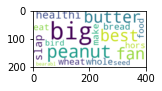

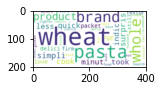

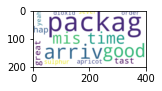

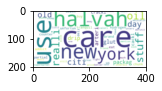

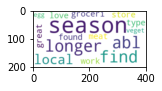

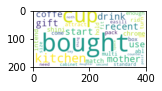

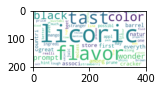

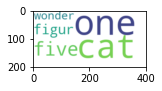

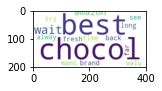

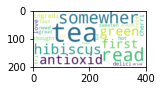

In [244]:
# Calling 'wc' function to get word cloud

wc(a10_c_avg, a10_k_avg)

# Observation:

With cluster 10, AVG WORD2VEC could cluster relevant reviews.

# Agglomerative Clustering- TF-IDF Word2Vec

# Calling 'tf_w' function to get TF-IDF Word2Vec

In [66]:
# Calling 'tf_w' function to get TF-IDF Word2Vec

# TFIDF Word2Vec for x_5k_l
x_5k_tf_w2v = tf_w(x_5k_l, w2v_word_ag, w2v_model_ag)

# Normalization

In [67]:
# Normalize data

x_5k_tw_n = normalize(x_5k_avg_w2v)
print("Shape of normalized TFIDF Word2Vec:" + ' ' + str(len(x_5k_tw_n)))

Shape of normalized TFIDF Word2Vec: 5000


# Calling 'ag_graph' function for graphical representation of number of review data in each cluster.

In [247]:
a2_k_tw = 2


With clusters 2 graphical representation of number of review data in each cluster


Graphical representation of number of review data in each cluster



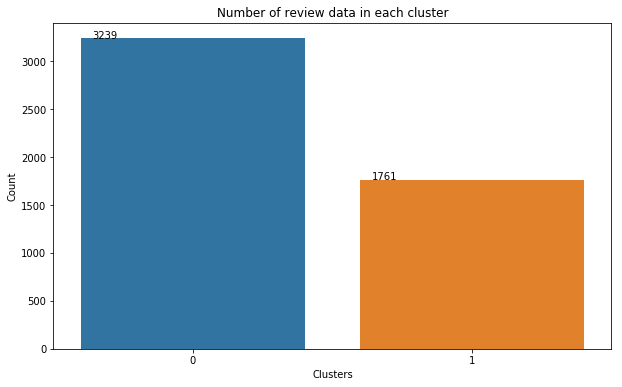

In [248]:
# Calling 'ag_graph' function for graphical representation of number of review data in each cluster.

a2_l_tw = ag_graph(x_5k_tw_n, a2_k_tw)

# Calling 'ac' function with cluster 2

In [249]:
# Calling 'ac' function with cluster 2

a2_c_tw = ac(x_5k_tw_n, a2_k_tw, a2_l_tw)


With clusters 2
*************************

**********
Cluster 0
**********

 good gallon half half gin sport mix never gin sport never truli play soccer child gin sport truli play soccer child adult unclear whether law physic law societi appli drink gin sport richard gere drink gin sport ever arrest think sport becom rare expens reason power grant anyon via shipment lbs powder mix good sport compel excel sport even one exist time save simpli handl pound powder delicaci mix gin powerad die like rest
***********************************

 yogi egyptian licoric herbal tea supplement count tea bag pack aveda experi ad bag egyptian licoric tea bag licoric mint tea mint less pronounc deep licoric flavor linger
***********************************

 use coffe creamer work instead non dairi substitut creamer avail break room tast good half half home coffe
***********************************

**********
Cluster 1
**********

 depend pantri item gluten intoler order bulk colleg son love tast easi

# Calling 'wc' function to get word cloud

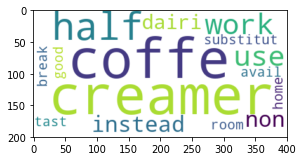

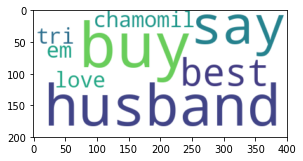

In [250]:
# Calling 'wc' function to get word cloud

wc(a2_c_tw, a2_k_tw)

# Observation:

With just 2 clusters, it is hard to conclude anything.

# Calling 'ag_graph' function for graphical representation of number of review data in each cluster.

In [251]:
a5_k_tw = 5


With clusters 5 graphical representation of number of review data in each cluster


Graphical representation of number of review data in each cluster



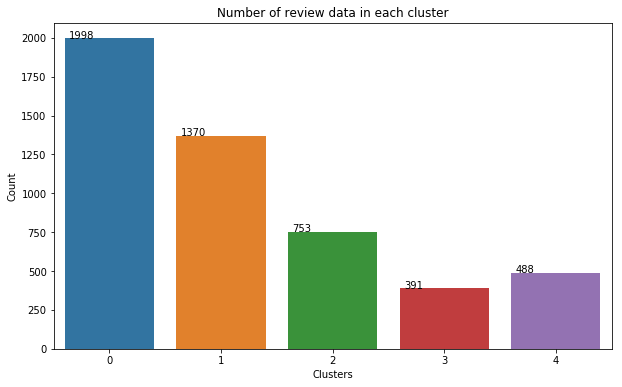

In [252]:
# Calling 'ag_graph' function for graphical representation of number of review data in each cluster.

a5_l_tw = ag_graph(x_5k_tw_n, a5_k_tw)

# Calling 'ac' function with cluster 5

In [253]:
# Calling 'ac' function with cluster 5

a5_c_tw = ac(x_5k_tw_n, a5_k_tw, a5_l_tw)


With clusters 5
*************************

**********
Cluster 0
**********

 order medium larg tug jug smell like plastic strong dog would go near matter food put tri friend dog four time dog could connect kibbl came let go want tug rope stiff could realli get grip rope also smell chemic bpa bottl cap inflex rope found unus sent back
***********************************

 wow bought box packag base posit review sorri basic tasteless gummi chewi bare resembl frog generic sweet go find peopl give remain bag away sorri bought expect anyth like regular gummi candi
***********************************

 disgust realli know review product good bought product homemad amchar left would wait someon go distanc acquir read ingredi pick put bottl time gave desper brought home open accompani dinner liter gave irrit tongu like pizza burn hot chees husband tri thought use clean toilet worst product ever purchas say born west indian utter appal product exist even wors store bought refund exchang money 

# Calling 'wc' function to get word cloud

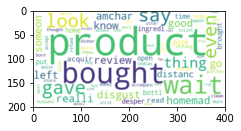

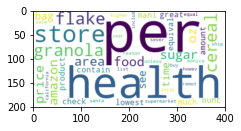

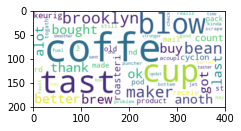

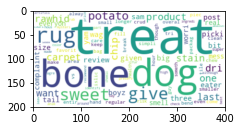

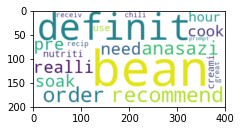

In [254]:
# Calling 'wc' function to get word cloud

wc(a5_c_tw, a5_k_tw)

# Observation:

With cluster 5, TFIDF Word2Vec didn't cluster relevant reviews well.

Example:

1) Cluster 0, 1 and 3 has reviewsa about 'dog'.

# Calling 'ag_graph' function for graphical representation of number of review data in each cluster.

In [255]:
a7_k_tw = 7


With clusters 7 graphical representation of number of review data in each cluster


Graphical representation of number of review data in each cluster



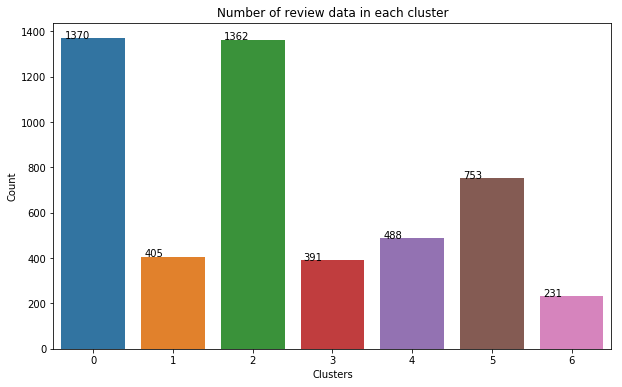

In [256]:
# Calling 'ag_graph' function for graphical representation of number of review data in each cluster.

a7_l_tw = ag_graph(x_5k_tw_n, a7_k_tw)

# Calling 'ac' function with cluster 7

In [257]:
# Calling 'ac' function with cluster 7

a7_c_tw = ac(x_5k_tw_n, a7_k_tw, a7_l_tw)


With clusters 7
*************************

**********
Cluster 0
**********

 search grape gum area long time gave friend valentin gift thank
***********************************

 product done wonder hair fingernail thru amazon alot cheaper natur food store
***********************************

 know sever year best licoric dut last week discov awesom deal pound less buck pay pound say fantast deal delici fantast wonder miss
***********************************

**********
Cluster 1
**********

 two littl plant grew inch tall die tri everyth water less water sunlight less sunlight noth seemd make better wors die slow death might tri anoth time
***********************************

 review must word long say yum time serious one lb packag small food rich make oz serv rich sweet serv dessert christma eve mass good irish grass feed cheddar kerrygold white wine goe well sweetish thing excel
***********************************

 made daughter cur hair like mine manag time dri tell product good

# Calling 'wc' function to get word cloud

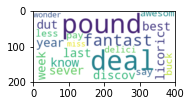

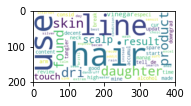

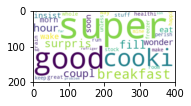

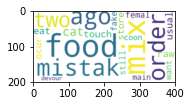

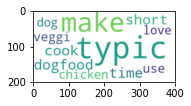

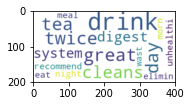

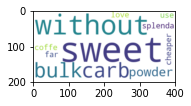

In [258]:
# Calling 'wc' function to get word cloud

wc(a7_c_tw, a7_k_tw)

# Observation:

With clusters 7, TFIDF Word2Vec couldn't cluster relevant reviews well.

Example:

1) Cluster 5 and 6 has reviews about 'coffee'.

# Calling 'ag_graph' function for graphical representation of number of review data in each cluster.

In [259]:
a10_k_tw = 10


With clusters 10 graphical representation of number of review data in each cluster


Graphical representation of number of review data in each cluster



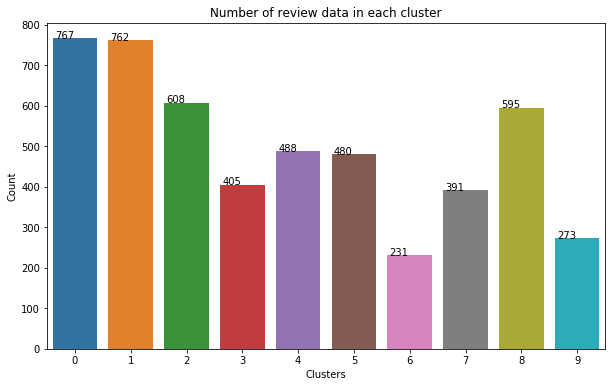

In [260]:
# Calling 'ag_graph' function for graphical representation of number of review data in each cluster.

a10_l_tw = ag_graph(x_5k_tw_n, a10_k_tw)

# Calling 'ac' function with cluster 10

In [261]:
# Calling 'ac' function with cluster 2

a10_c_tw = ac(x_5k_tw_n, a10_k_tw, a10_l_tw)


With clusters 10
*************************

**********
Cluster 0
**********

 bought muffin tri increas fiber daughter diet read review expect high expect tast good aregular sugar laden muffin let face tast like cupcak expect disappoint tast near good bakeri bought high calor muffin rather bland sweet understand anyon could call delici delici howev picki year old eat guess eat anyth disguis chocol
***********************************

 experienc lindt milk chocol first switzerland mani time sinc place simpli best milk chocol ever tast
***********************************

 great altern regular cornbread husband hardley tell differ isnt gluten free great thing food room gluten free crave bread
***********************************

**********
Cluster 1
**********

 love abl order item onlin deliv price amaz worri run food furri foster babi much appreci
***********************************

 live ride florida year came across sport bean great altern powerbar gel block gu year ago great ton e

# Calling 'wc' function to get word cloud

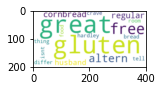

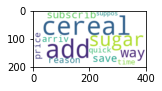

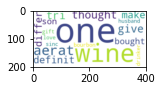

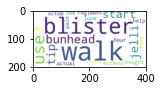

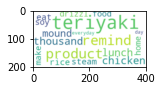

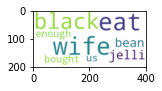

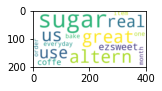

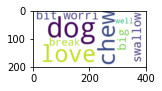

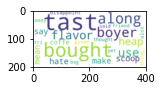

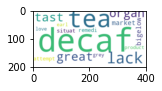

In [262]:
# Calling 'wc' function to get word cloud

wc(a10_c_tw, a10_k_tw)

# Observation:

With clusters 10, TFIDF Word2Vec couldn't cluster relevant reviews well.

Example:

1) Cluster 3 and 7 has reviews about 'dog'.

2) Cluster 5 and 6 has reviews about 'coffee'.

# DBSCAN clustering

# Defining a function to get best 'epsilon' using elbow-knee method.

Nearest neighbors concept referred from https://scikit-learn.org/stable/modules/neighbors.html

In [445]:
# Defining a function to get best 'epsilon' using elbow-knee method.

# Import library
from sklearn.neighbors import NearestNeighbors

def eps(x):
    
    min_pts = 2 * x.shape[1]
    
    nb = NearestNeighbors(n_neighbors = min_pts)     # Returns kth nearest neighbors
    nb_f = nb.fit(x)
    distances, indices = nb_f.kneighbors(x)          # Returns distances and corresponding indices
    
    dis_m = []
    ind = np.arange(distances.shape[0])
    
    for i in ind:
        
        a = distances[i].mean()
        dis_m.append(a)
        
    dis_s = np.sort(dis_m)
    
    print("\n\t    To find the best Espilon value\n")
    plt.plot(ind, dis_s)
    plt.grid()
    plt.title("Indices points v/s Kth Nearest Neighbors")
    plt.xlabel("Indices points")
    plt.ylabel("Kth Nearest Neighbors")

# Defining a function 'db_graph' to graphically represnt the count of review data in each cluster.

In [449]:
# Defining a function 'db_graph' to graphically represnt the count of review data in each cluster.

# import libraries
from sklearn.cluster import DBSCAN

def db_graph(x, e):
    
    db = DBSCAN(eps = e, min_samples = 2)
    db = db.fit(x)
    label = db.labels_
    
    label_s = set(label)
    label_l = list(label_s)
    label_lgt = len(label_l)
    
    print("\nWith epsilon", e, "graphical representation of number of review data in each cluster\n")
    plt.figure(figsize = (10,6))
    
    ht = sns.countplot(label)
    plt.title("Number of review data in each cluster")
    plt.xlabel("Clusters")
    plt.ylabel("Count")

    for i in ht.patches:
        ht.text(i.get_x()+.04, i.get_height()+0.2, \
            str(round((i.get_height()), 2)))
    
    return label, label_lgt

In [450]:
# Defining functions 'db' to represent words in cluster.

def db(x, e, label):

    cluster_data = []
    
    df_sort_5k['label'] = label
    sets = set(label)
    lists = list(sets)
    print("\nWith Epsilon", e)
    print("*"*25)
    
    for i in lists:
        print()
        print('*'*10)
        print("Label", i)
        print('*'*10)
        lt = len(df_sort_5k[df_sort_5k['label'] == i])
        rd = np.random.randint(low = 0, high = lt, size = 3)
        rd_s = set(rd)
        rd_l = list(rd_s)
        
        for n in rd_l:
            wd = df_sort_5k[df_sort_5k['label'] == i]['Clean_Text'].iloc[n]
            print('\n',wd)
            print("*"*35)
            
        cluster_data.append(wd)
    
    return cluster_data

# DBSCAN: Avg Word2Vec

# Feature scaling: Standardization

In [459]:
# Import standardization library
from sklearn.preprocessing import StandardScaler

# Create an instance or object
sc = StandardScaler()

x_5k_avg_s = sc.fit_transform(x_5k_avg_w2v)
print("Shape of standardized Avg Word2Vec:" + ' ' + str(len(x_5k_avg_s)))

Shape of standardized Avg Word2Vec: 5000


# Calling 'eps' function to find the best epsilon value with elbow-knee method


	    To find the best Espilon value



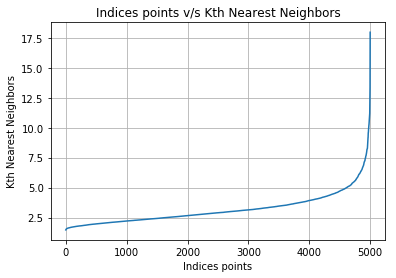

In [446]:
# Calling 'eps' function to find the best epsilon value

eps(x_5k_avg_s)

# Observation:
    
Best epsilon we observed is 6.

# Calling 'db_graph' function for graphical representation of number of review data in each cluster.

In [447]:
d_e_avg = 6


With epsilon 6 graphical representation of number of review data in each cluster



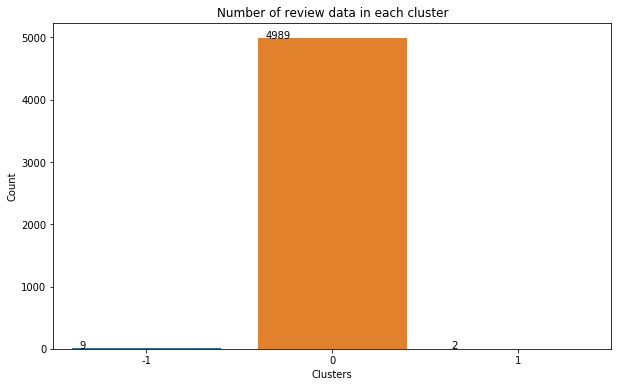

In [452]:
# Calling 'db_graph' function for graphical representation of number of review data in each cluster.

d_l_avg, d_k_avg = db_graph(x_5k_avg_s, d_e_avg)

# Calling 'db' function with epsilon 6

In [453]:
# Calling 'db' function with epsilon 6

d_c_avg = db(x_5k_avg_s, d_e_avg, d_l_avg)


With Epsilon 6
*************************

**********
Label 0
**********

 natur diet drink amaz better tast rootbeer found store better origin realiz diet bought mind actual much better opinion non diet version note realli good deal get free ship amazon prime sale store cost give take
***********************************

 bought father birthday big jack daniel drinker enjoy good chocol amaz realli like jack daniel liquor chocol must tri perfect combo liquor chocol wrap one
***********************************

 dad diabet alway lookout sugar free item enjoy mio one product whole famili enjoy easi use tast fantast even kid think cool control amount product drink everybodi get desir strength flavor also love fact take along purs enjoy go far sweet tea favorit flavor plan tri thank amazon
***********************************

**********
Label 1
**********

 est condimento te saca de apuro es muy bueno porqu realment es ajo deshidratado es polvo las alita de pollo con esto salsa barbacu que

# Calling 'wc' function to get wordcloud

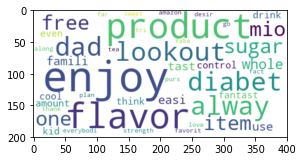

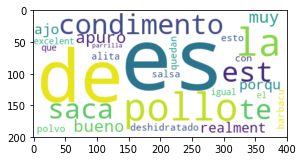

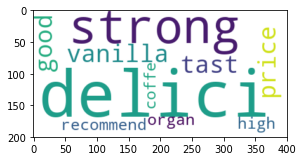

In [454]:
# # Calling 'wc' function to get wordcloud

wc(d_c_avg, d_k_avg)

# Observation:

With epsilon 6, Avg Word2Vec didn't work well.

Most of the reviews are bound to be in cluster 0.

# DBSCAN: TFIDF Word2Vec

# Standardization

In [460]:
# Standardize data

x_5k_tw_s = sc.fit_transform(x_5k_tf_w2v)
print("Shape of standardized TFIDF Word2Vec:" + ' ' + str(len(x_5k_tw_s)))

Shape of standardized TFIDF Word2Vec: 5000


# Calling 'eps' function to get best epsilon using elbow-knee method.


	    To find the best Espilon value



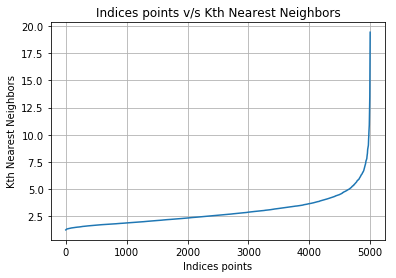

In [461]:
# Calling 'eps' function to get best epsilon using elbow-knee method.

eps(x_5k_tw_s)

# Observation:
    
Best epsilon is 5

# Calling 'db_graph' function for graphical representation of number of review data in each cluster.

In [469]:
d_e_tw = 5


With epsilon 5 graphical representation of number of review data in each cluster



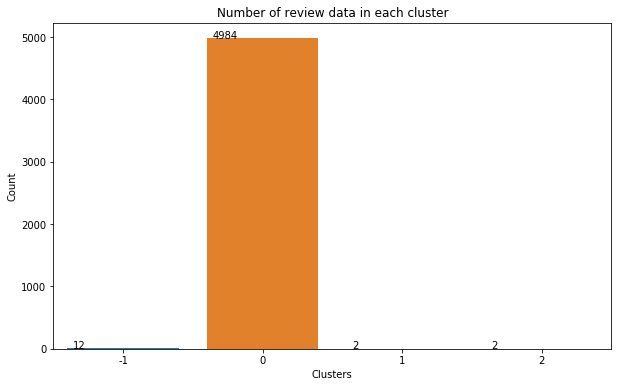

In [470]:
# Calling 'ag_graph' function for graphical representation of number of review data in each cluster.

d_l_tw, d_k_tw = db_graph(x_5k_tw_s, d_e_tw)

# Calling 'db' function with epsilon 5

In [472]:
# Calling 'db' function with epsilon 5

d_c_tw = db(x_5k_tw_s, d_e_tw, d_l_tw)


With Epsilon 5
*************************

**********
Label 0
**********

 timothi world coffe italian blend keurig like favorit around coffe blend somewher medium mild blend aromat coffe sure pleas discrimin famili friend
***********************************

 tini littl yorki abl chew treat minut make huge mess would give star option realli everlast behind ugh cost last longer make huge mess
***********************************

 butter chicken curri made mom next day went local indian place homemad pouch everi bit good restaur hint much salt like claim order other also work well pork steak although prefer chicken pork spice mix though also tri ad coconut milk tast awesom way
***********************************

**********
Label 1
**********

 excel falafel mix spici spici contain fava bean chickpea brand leav fava bean add wheat flour instruct say add cup water cup mix much water cup water reason alway add water thick
***********************************

 filter purifi water absolut d

# Calling 'wc' function to get wordcloud

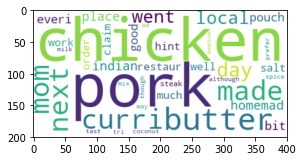

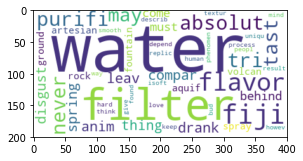

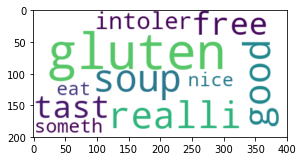

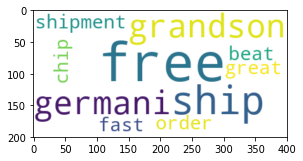

In [473]:
# Calling 'wc' function to get wordcloud

wc(d_c_tw, d_k_tw)

# Observation:

With epsilon 5, TFIDF Word2Vec didn't work well.

1) Most of the reviews are bound to be in cluster 0

In [483]:
from prettytable import PrettyTable

a = PrettyTable()

a.field_names = ['S.No', 'Vectorizer', 'K value', 'Inertia', 'Performance']

a.add_row([1, 'BoW', 9, 44583.647, 'Not Good'])
a.add_row([2, 'TFIDF', 9, 47429.563, 'Good'])
a.add_row([3, 'AVG Word2Vec', 9, 20567.295, 'Not Good'])
a.add_row([4, 'TFIDF Word2Vec', 9, 23958.097, 'Not Good'])

print()
print(a.get_string(title = 'Table for K Means Clustering'))

from prettytable import PrettyTable

b = PrettyTable()

b.field_names = ['S.No', 'Vectorizer', 'K values', 'Performance']

b.add_row([1, 'AVG Word2Vec', 2, 'Not Good'])
b.add_row([2, 'AVG Word2Vec', 5, 'Not Good'])
b.add_row([3, 'AVG Word2Vec', 7, 'Good'])
b.add_row([4, 'AVG Word2Vec', 10, 'Good'])
b.add_row([5, 'TFIDF Word2Vec', 2, 'Not Good'])
b.add_row([6, 'TFIDF Word2Vec', 5, 'Not Good'])
b.add_row([7, 'TFIDF Word2Vec', 7, 'Not Good'])
b.add_row([8, 'TFIDF Word2Vec', 10, 'Not Good'])

print()
print(b.get_string(title = 'Table for Agglomerative Clustering'))

from prettytable import PrettyTable

c = PrettyTable()

c.field_names = ['S.No', 'Vectorizer', 'Epsilon', 'Performance']

c.add_row([1, 'AVG Word2Vec', 6, 'Not Good'])
c.add_row([2, 'TFIDF Word2Vec', 5, 'Not Good'])

print()
print(c.get_string(title = 'Table for DBSCAN Clustering'))


+-----------------------------------------------------------+
|                Table for K Means Clustering               |
+------+----------------+---------+-----------+-------------+
| S.No |   Vectorizer   | K value |  Inertia  | Performance |
+------+----------------+---------+-----------+-------------+
|  1   |      BoW       |    9    | 44583.647 |   Not Good  |
|  2   |     TFIDF      |    9    | 47429.563 |     Good    |
|  3   |  AVG Word2Vec  |    9    | 20567.295 |   Not Good  |
|  4   | TFIDF Word2Vec |    9    | 23958.097 |   Not Good  |
+------+----------------+---------+-----------+-------------+

+------------------------------------------------+
|       Table for Agglomerative Clustering       |
+------+----------------+----------+-------------+
| S.No |   Vectorizer   | K values | Performance |
+------+----------------+----------+-------------+
|  1   |  AVG Word2Vec  |    2     |   Not Good  |
|  2   |  AVG Word2Vec  |    5     |   Not Good  |
|  3   |  AVG Word2Ve

# Conclusion

# K Means clustering:

Only TFIDF culstered the reviews with relevant texts.

# Agglomerative Clustering

Avg Word2Vec culstered the reviews with relevant texts only when the cluster size is increasing say for 7 and 10 clusters, it performed well.

# DBSCAN:

DBSCAN doesn't seem to work well with Amazon Fine Food Review dataset.

# Overall conclusion:

K Means performed well with TFIDF vectoriser and Agglomerative culstering performed well with Avg Word2Vec vectoriser with clusters 7 and 10.

